# Pre-Class Assignment: Histograms and Histogram Equalization

This pre-class assignment will explore image histograms and the histogram equalization algorithm.  

# Goals for today's pre-class assignment 

</p>

1. Viewing Image Histograms
1. Histogram Equalization
1. Assignment wrap-up

----
# 0. Download Image

In [5]:
#The following code snip-it downloads a file from internet and saves it to your local directory.
%matplotlib inline
import numpy as np
from scipy import misc, ndimage
import matplotlib.pylab as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from urllib.request import urlopen, urlretrieve

url = 'https://goo.gl/nbNaAH'
file = './retna.jpg'
urlretrieve(url, file);

im = misc.imread(file)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [6]:
#Convert color image to grayscale
import skimage.color as color
gray = color.rgb2gray(im)

Text(0.5,1,'Grayscale Image')

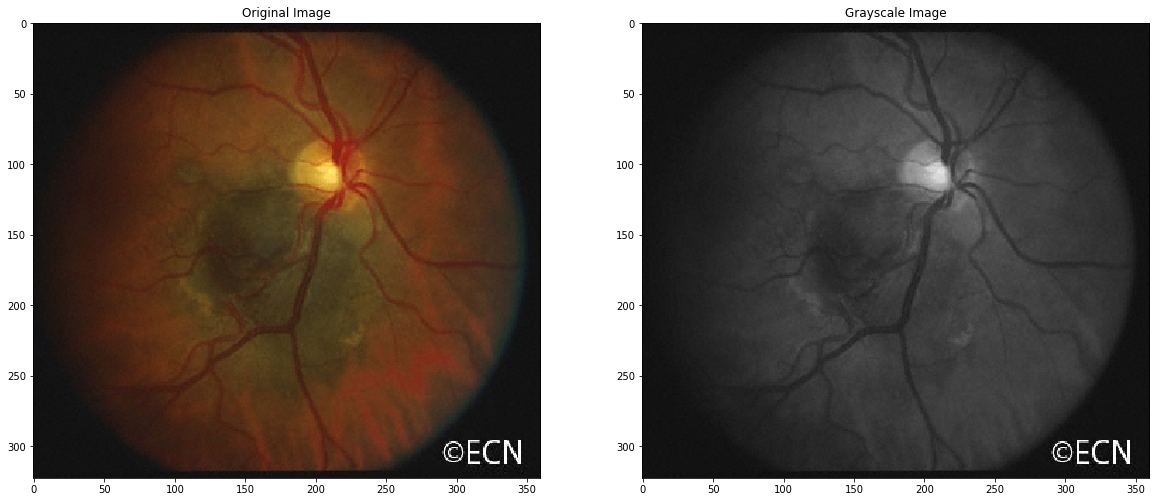

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))

ax1.imshow(im)
ax1.set_title('Original Image')
ax2.imshow(gray,cmap='gray')
ax2.set_title('Grayscale Image')

# 1. Viewing Image Histograms

>An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image. It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.

<p style="text-align: right;"> <a href="https://en.wikipedia.org/wiki/Image_histogram">Image histogram - Wikipedia</a></p>
 
The following code snip-its generate histograms for the provided example Image. Note it is common to use a different histogram for each channel. 

Text(0.5,1,'Historgams for Overlayed Red, Green and Blue Channels of a color image')

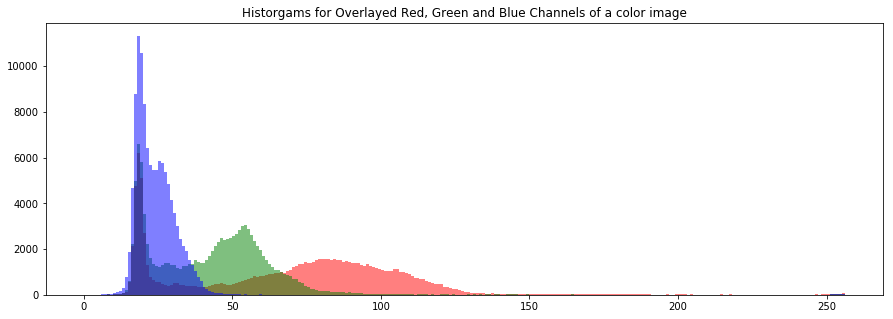

In [8]:
#RGB Histogram snip-it of an image. Each channel calculated separately and displayed in the same image

fig = plt.figure(figsize=(15,5))

plt.hist(im[:,:,0].ravel(), alpha=0.5, bins=256, range=(0, 256), color='red');
plt.hist(im[:,:,1].ravel(), alpha=0.5, bins=256, range=(0, 256), color='green');
plt.hist(im[:,:,2].ravel(), alpha=0.5, bins=256, range=(0, 256), color='blue');
plt.title('Historgams for Overlayed Red, Green and Blue Channels of a color image')

Text(0.5,1,'Historgams for Grayscale Image')

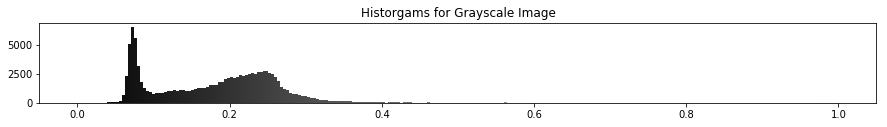

In [9]:
#Histogram snip-it for a grayscale image
import skimage.filters as filters

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(311)  
i = 0
N, bins, patches = ax1.hist(gray.ravel(), bins=255, range=(0, 1), color='gray');
for thispatch in patches:
    #color = plt.cm.viridis(i/len(patches))
    frac = i/len(patches)
    thispatch.set_facecolor((frac,frac,frac))
    i += 1
    
plt.title('Historgams for Grayscale Image')

In [10]:
#Convert to hsv
import matplotlib.colors as colors
hsv = colors.rgb_to_hsv(im)

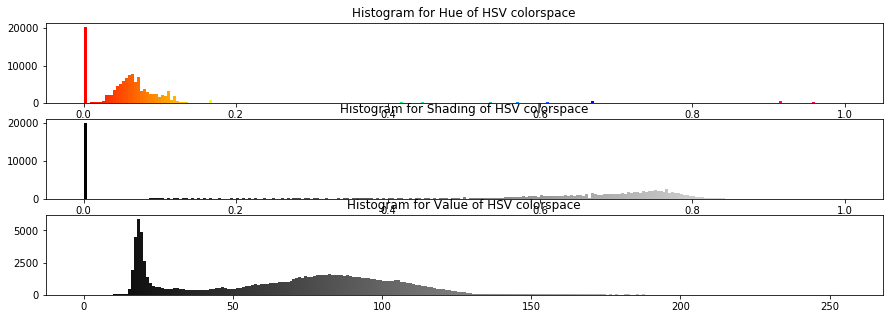

In [11]:
#Histogram snip-it for a HSV colorspace. Each histogram displaed on a seperate axis.
import skimage.filters as filters

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(311)  
ax1.set_title('Histogram for Hue of HSV colorspace')
i = 0
N, bins, patches = ax1.hist(hsv[:,:,0].ravel(), bins=255, range=(0, 1), color='gray');
for thispatch in patches:
    #color = plt.cm.viridis(i/len(patches))
    frac = i/len(patches)
    my_color = colors.hsv_to_rgb([frac,1,255])/256.0
    thispatch.set_facecolor(my_color)
    i += 1
    
ax2 = fig.add_subplot(312)  
ax2.set_title('Histogram for Shading of HSV colorspace')
i = 0
N, bins, patches = ax2.hist(hsv[:,:,1].ravel(), bins=255, range=(0, 1), color='gray');
for thispatch in patches:
    #color = plt.cm.viridis(i/len(patches))
    frac = i/len(patches)
    thispatch.set_facecolor((frac,frac,frac))
    i += 1
    

ax3 = fig.add_subplot(313)   
ax3.set_title('Histogram for Value of HSV colorspace')
i = 0
N, bins, patches = ax3.hist(hsv[:,:,2].ravel(), bins=255, range=(0, 255), color='gray');
for thispatch in patches:
    #color = plt.cm.viridis(i/len(patches))
    frac = i/len(patches)
    thispatch.set_facecolor((frac,frac,frac))
    i += 1
    

----

# 2. Histogram Equalization

Histogram Equalization is a method that improves the contrast in an image, in order to stretch out the intensity range to fill the available space. 

> This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values.

> The method is useful in images with backgrounds and foregrounds that are both bright or both dark. In particular, the method can lead to better views of bone structure in x-ray images, and to better detail in photographs that are over or under-exposed. A key advantage of the method is that it is a fairly straightforward technique and an invertible operator. So in theory, if the histogram equalization function is known, then the original histogram can be recovered. The calculation is not computationally intensive. A disadvantage of the method is that it is indiscriminate. It may increase the contrast of background noise, while decreasing the usable signal.

<p style="text-align: right;"> <a href="https://en.wikipedia.org/wiki/Histogram_equalization">Histogram Equalization - Wikipedia</a></p>

This section shows different types of histogram equalizations on both grayscale and color images:

### Grayscale Histogram Equalization

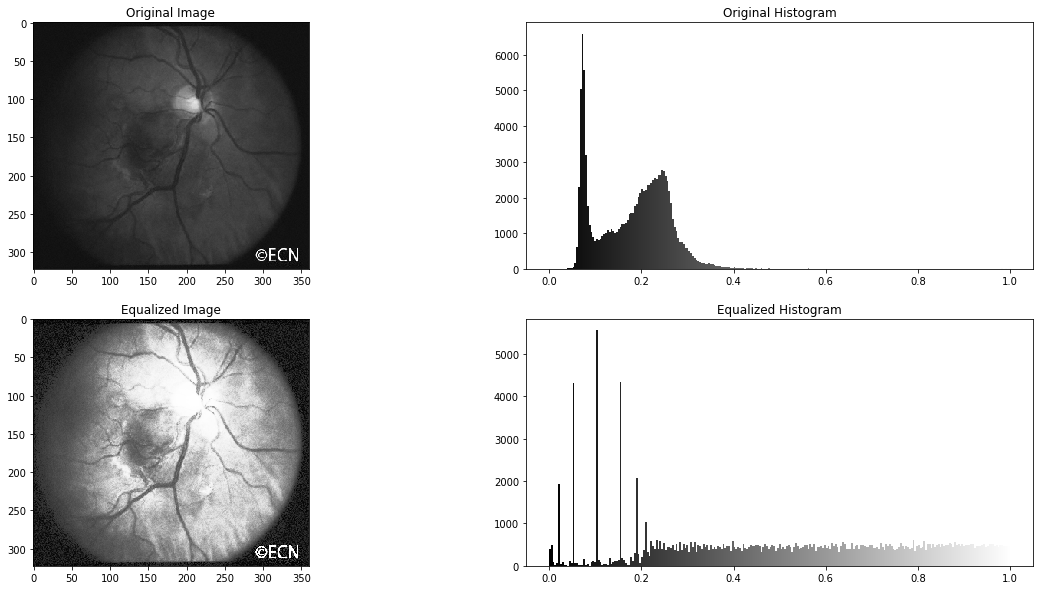

In [12]:
#Histogram Equalization on a grayscale image

from skimage import exposure

f, (ax1, ax2) = plt.subplots(2, 2,figsize=(20,10))

ax1[0].imshow(gray,cmap='gray')
ax1[0].set_title('Original Image')
N, bins, patches = ax1[1].hist(gray.ravel(), bins=255, range=(0, 1), color='gray');
ax1[1].set_title('Original Histogram')
# Stuff to make the histogram bars pretty
i = 0
for thispatch in patches:
    frac = i/len(patches)
    thispatch.set_facecolor((frac,frac,frac))
    i += 1

gray2 = exposure.equalize_hist(gray)  ##Function actually doing the histgoram equalization


ax2[0].imshow(gray2,cmap='gray')
ax2[0].set_title('Equalized Image')
N, bins, patches = ax2[1].hist(gray2.ravel(), bins=255, range=(0, 1), color='gray');
ax2[1].set_title('Equalized Histogram')
# Stuff to make the histogram bars pretty
i = 0
for thispatch in patches:
    #color = plt.cm.viridis(i/len(patches))
    frac = i/len(patches)
    thispatch.set_facecolor((frac,frac,frac))
    i += 1

### Color Histogram Equalization

Histogram equalization on color images can be completed in multiple ways. This section shows the following:

- Histogram Equalization across all channels in RGB.  (**Note the UserWarning**)
- Histogram Equalization across RGB channels independently.
- Histogram Equalization across the S and V channels in an HSV image:

In [13]:
# Code snip-it to do do histogram equalization on an RGB image with R, B and G in the same histogram
im2 = exposure.equalize_hist(im)

f, (ax1, ax2) = plt.subplots(2, 2,figsize=(20,10))

ax1[0].imshow(im)
ax1[0].set_title('Original Image')

ax1[1].hist(im.ravel(),bins=256);
ax1[1].set_title('Original Histogram (Combined R,G,B)')

ax2[0].set_title('Histogram Equailzation on entire rgb image')
ax2[0].imshow(im2)
ax2[1].hist(im2.ravel(),bins=256);
ax2[1].set_title('Equalized Histogram (Combined R,G,B)')

/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


Text(0.5,1,'Equalized Histogram (Combined R,G,B)')

http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_local_equalize.html#sphx-glr-auto-examples-color-exposure-plot-local-equalize-py

In [14]:

from skimage.morphology import disk, star
from skimage.filters import rank
# Equalization
selem = disk(50)
img_eq = rank.equalize(gray, selem=selem)

plt.imshow(img_eq,cmap='gray')


/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [15]:
use_global = False


In [16]:
# Show color channels and do Histogram equalization on each channel Seperately
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 4,figsize=(20,20))

im3 = im.copy()
color = ['Red','Green','Blue']
for i in [0,1,2]:
    original = np.ubyte(np.zeros(im.shape))
    original[:,:,i] = im[:,:,i]

    # Do histogram Equalization on the chanel
    if use_global:
        channel =  exposure.equalize_hist(im[:,:,i])*256
    else:
        channel  = rank.equalize(im[:,:,i], selem=selem)
    
    histeq = np.ubyte(np.zeros(im.shape))
    histeq[:,:,i] = channel
    im3[:,:,i] = channel.copy()
    
    ax1[i].imshow(original)
    ax1[i].set_title(color[i]+' Channel')
    
    ax2[i].hist(im[:,:,i].ravel(), bins=255,color=color[i])
    
    ax3[i].imshow(histeq)
    ax4[i].hist(channel.ravel(), bins=255, color=color[i])
    


ax1[3].imshow(im)
ax1[3].set_title('Original Image')
ax2[3].axis('off')
ax3[3].imshow(im3)
ax3[3].set_title('Histogram Equalization \n on each RGB channel')
ax4[3].axis('off')

(0.0, 1.0, 0.0, 1.0)

In [17]:
# Show color channels and do Histogram equalization on each channel Seperately
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 4,figsize=(20,20))


#h = exposure.equalize_hist(hsv[:,:,0])
h = hsv[:,:,0]

if use_global:
    s = exposure.equalize_hist(hsv[:,:,1])
    v = exposure.equalize_hist(hsv[:,:,2])
else:
    s  = rank.equalize(hsv[:,:,1], selem=selem)/256
    v  = rank.equalize(hsv[:,:,2]/256, selem=selem)/256

ax1[0].imshow(hsv[:,:,0], cmap='hsv')
ax1[0].set_title('Hue Space')
ax2[0].axis('off')
ax3[0].imshow(h,cmap='hsv')
ax4[0].axis('off')

ax1[1].imshow(hsv[:,:,1], cmap='gray')
ax1[1].set_title('Shading Space')
ax2[1].hist(hsv[:,:,1].ravel(), bins=255)
ax3[1].imshow(s,cmap='gray')
ax4[1].hist(s.ravel(),bins=255)

ax1[2].imshow(hsv[:,:,2], cmap='gray')
ax1[2].set_title('Value Space')
ax2[2].hist(hsv[:,:,2].ravel(), bins=255, color='gray')
ax3[2].imshow(v,cmap='gray')
ax4[2].hist(v.ravel(),bins=255, color='gray')

hsv2 = hsv.copy()

#hsv2[:,:,0] = h
hsv2[:,:,1] = s
hsv2[:,:,2] = v


#Convert Equalized HSV back into RGB Image for displaying
im4 = colors.hsv_to_rgb(hsv2)

ax1[3].imshow(im)
ax1[3].set_title('Original Image')
ax2[3].axis('off')
ax3[3].imshow(im4)
ax3[3].set_title('Histogram Equalization \n on each RGB channel')
ax4[3].axis('off')

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(0.0, 1.0, 0.0, 1.0)

### Comparison of  Color Histogram Equalizations

Text(0.5,1,'Histogram Equailzation on \n S and V channels of HSV image')

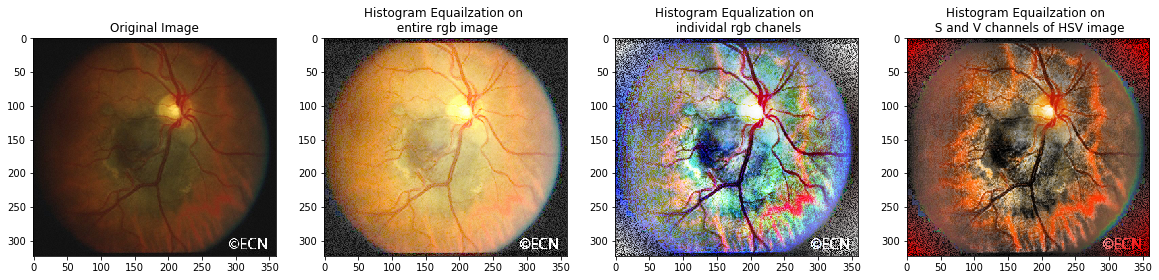

In [18]:
f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4,figsize=(20,10))

ax1.imshow(im)
ax2.imshow(im2)
ax3.imshow(im3)
ax4.imshow(im4)

ax1.set_title('Original Image')
ax2.set_title('Histogram Equailzation on \n entire rgb image')
ax3.set_title('Histogram Equalization on \n individal rgb chanels')
ax4.set_title('Histogram Equailzation on \n S and V channels of HSV image')


----
# 3. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

Direct Link: https://goo.gl/ZXmfUi

In [19]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/ZXmfUi?embedded=true" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

&#169; Copyright 2018,  Michigan State University Board of Trustees